In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df = pd.read_csv("auto-cleaned.csv")
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Numeryczna analiza dwuwymiarowa

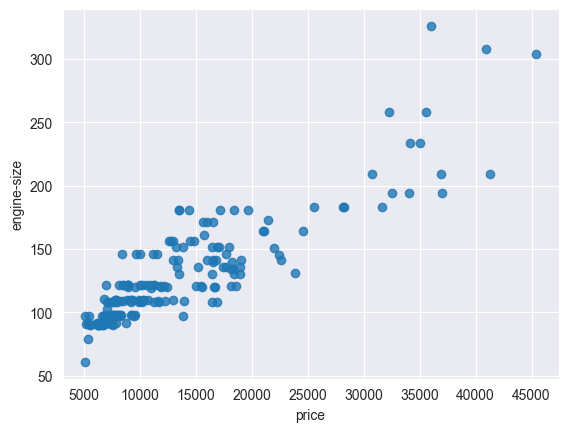

price                1.00
engine-size          0.89
curb-weight          0.84
horsepower           0.81
width                0.75
length               0.70
wheel-base           0.58
bore                 0.55
height               0.14
stroke               0.10
compression-ratio    0.07
symboling           -0.08
peak-rpm            -0.10
city-mpg            -0.71
highway-mpg         -0.72
Name: price, dtype: float64


In [4]:
sns.regplot(data=df,x='price',y='engine-size', fit_reg=False)
plt.show()
corr = np.round(df.corr(numeric_only=True),2)
price_corr = corr['price'].sort_values(ascending=False)
print(price_corr)

Heterogeniczność i stratyfikacja​

In [5]:
df['body-style'].value_counts()

body-style
sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: count, dtype: int64

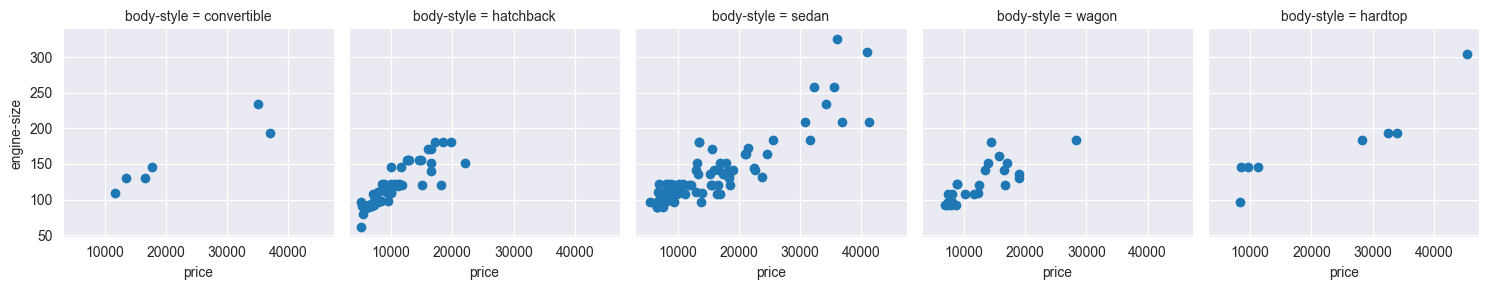

In [6]:
sns.FacetGrid(data=df,col='body-style').map(plt.scatter,'price','engine-size').add_legend()
plt.show()

In [13]:
bodies = df['body-style'].unique()

for body in bodies:
    print(body)
    print(df.loc[df('body-style')] == body, ['price','engine-size'].corr())
    print()

convertible


Analiza dwuwymiarowa kategoryczna

In [8]:
crosstab = pd.crosstab(df['body-style'], df['num-of-cylinders'])
print(crosstab)

num-of-cylinders  eight  five  four  six  three  twelve
body-style                                             
convertible           1     0     4    1      0       0
hardtop               1     1     4    2      0       0
hatchback             0     0    56    6      1       0
sedan                 2     7    69   13      0       1
wagon                 0     2    20    2      0       0


In [9]:
crosstab = pd.crosstab(df['body-style'],df['num-of-cylinders'])

In [10]:
grouped_table = df.groupby(['body-style','num-of-cylinders']).size()
grouped_table_normalized = grouped_table.unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)
round(grouped_table_normalized,2)

num-of-cylinders,eight,five,four,six,three,twelve
body-style,,,,,,
convertible,0.17,0.00,0.67,0.17,0.00,0.00
hardtop,0.12,0.12,0.50,0.25,0.00,0.00
hatchback,0.00,0.00,0.89,0.10,0.02,0.00
sedan,0.02,0.08,0.75,0.14,0.00,0.01
wagon,0.00,0.08,0.83,0.08,0.00,0.00


Mieszana analiza dwuwymiarowa danych liczbowych i kategorycznych​

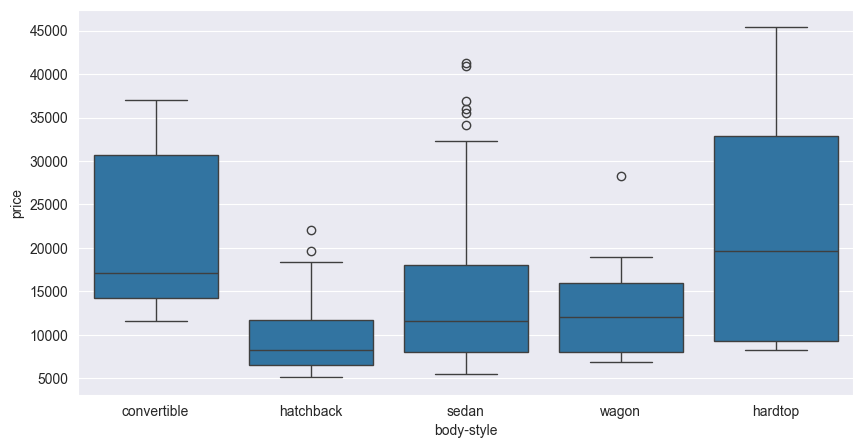

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['body-style'],y=df['price'])
plt.show()

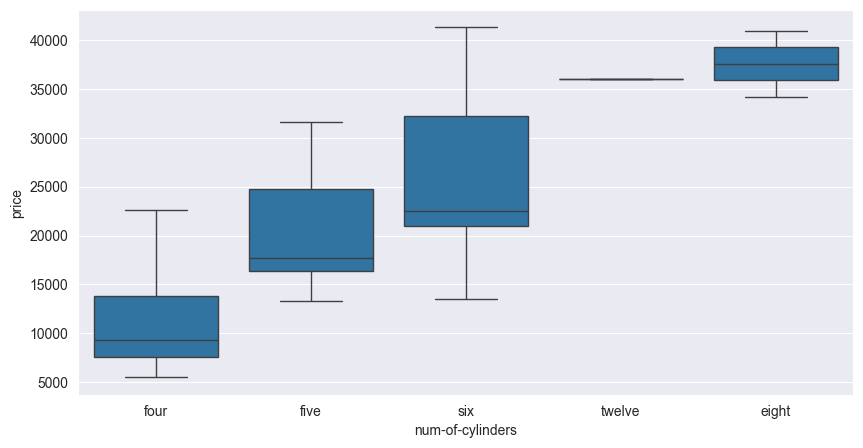

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df[df['body-style']=='sedan']['num-of-cylinders'],y=df[df['body-style']=='sedan']['price'])
plt.show()